In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_json('chimefrb_voevent_data.json')
df_exploded = df.explode('records')
records_normalized = pd.json_normalize(df_exploded['records'])
result_df = pd.concat([df_exploded.drop(columns=['records']).reset_index(drop=True), records_normalized], axis=1)


In [14]:
print(df)

                                                records   event_id
0     [{'Dec': 39.2732, 'Alert_Type': 'detection', '...  190351705
1     [{'Dec': 69.1957, 'Alert_Type': 'detection', '...  190367199
2     [{'Dec': 43.5478, 'Alert_Type': 'detection', '...  190391526
3     [{'Dec': 46.9633, 'Alert_Type': 'subsequent', ...  190401595
4     [{'Dec': 44.6009, 'Alert_Type': 'detection', '...  190465754
...                                                 ...        ...
2276  [{'Alert_Type': 'Subsequent', 'Detected': '202...  384654489
2277  [{'Alert_Type': 'Detection', 'Detected': '2024...  384747341
2278  [{'Alert_Type': 'Subsequent', 'Detected': '202...  384777295
2279  [{'Alert_Type': 'Detection', 'Detected': '2024...  385011642
2280  [{'Alert_Type': 'Detection', 'Detected': '2024...  389513996

[2281 rows x 2 columns]


In [15]:
print(result_df)

       event_id      Dec  Alert_Type Localization_Error  \
0     190351705  39.2732   detection             0.6381   
1     190367199  69.1957   detection             1.3797   
2     190391526  43.5478   detection             0.6483   
3     190401595  46.9633  subsequent             0.6272   
4     190465754  44.6009   detection             0.6066   
...         ...      ...         ...                ...   
2360  384654489   65.711  Subsequent              0.945   
2361  384747341   44.414   Detection              0.556   
2362  384777295   72.465  Subsequent              1.248   
2363  385011642   13.372   Detection              0.395   
2364  389513996   61.006   Detection              0.852   

                              Detected        SNR          DM        RA  \
0     2021-10-08 15:36:43.881584+00:00    11.1073   69.956802  132.2486   
1     2021-10-08 18:54:22.175139+00:00    10.1039     57.0168  178.8937   
2     2021-10-08 22:45:14.923161+00:00    12.0421  455.729797  238

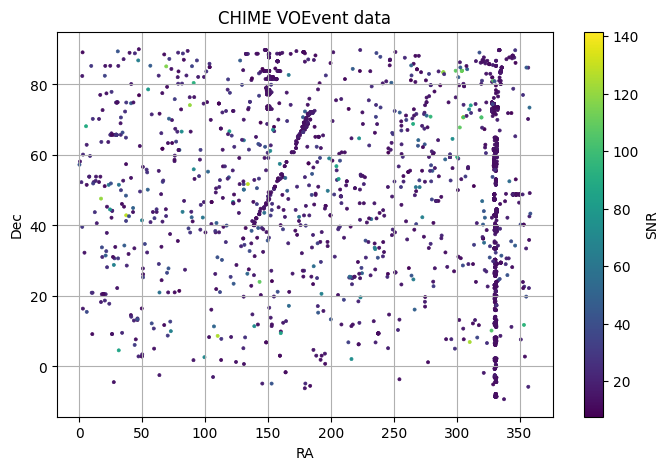

In [4]:
plt.figure(figsize=(8, 5))
#stuff = result_df[result_df['Alert_Type'] == "detection"]
stuff = result_df
sizes = pd.to_numeric(stuff['Localization_Error'], errors='coerce')
colors = pd.to_numeric(stuff['SNR'])
scatter = plt.scatter(stuff['RA'], stuff['Dec'], alpha=1,s=5,c=colors,linewidth=0.5)
cbar = plt.colorbar(scatter)
cbar.set_label('SNR')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('CHIME VOEvent data')
plt.grid(True)
plt.show()